In [1]:
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

--2023-10-26 07:07:26--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  1.90MB/s    in 1.3s    

2023-10-26 07:07:27 (1.90 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [2]:
!unzip -nq spa-eng.zip

In [3]:
!ls

sample_data  spa-eng  spa-eng.zip


In [4]:
!ls spa-eng

_about.txt  spa.txt


In [5]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [6]:
# compile eng-spa translations
eng2spa = {}
for line in open('spa-eng/spa.txt'):
    line = line.rstrip()
    eng, spa = line.split('\t')
    if eng not in eng2spa:
        eng2spa[eng] = []
    eng2spa[eng].append(spa)

In [7]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [8]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [10]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [11]:
tokenizer.tokenize("¿Qué me cuentas?".lower())

['qué', 'me', 'cuentas']

In [12]:
smoother = SmoothingFunction()
tokens = tokenizer.tokenize("¿Qué me cuentas?".lower())
sentence_bleu([tokens], tokens, smoothing_function=smoother.method4)

0.5757197301274735

In [13]:
sentence_bleu([['hi']], ['hi'], smoothing_function=smoother.method4)

1.0

In [14]:
sentence_bleu(['hi there'.split()], 'hi there'.split(),
              smoothing_function=smoother.method4)

0.2213885886251307

In [15]:
sentence_bleu(['hi there friend'.split()], 'hi there friend'.split(),
              smoothing_function=smoother.method4)

0.5757197301274735

In [16]:
sentence_bleu([[1, 2, 3, 4]], [1, 2, 3, 4])

1.0

In [17]:
eng2spa_tokens = {}
for eng, spa_list in eng2spa.items():
    spa_list_tokens = []
    for text in spa_list:
        tokens = tokenizer.tokenize(text.lower())
        spa_list_tokens.append(tokens)
    eng2spa_tokens[eng] = spa_list_tokens

In [18]:
!pip install transformers sentencepiece transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.3 MB/s eta 0:00:00


In [19]:
from transformers import pipeline
translator = pipeline('translation', model = "Helsinki-NLP/opus-mt-en-es")

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [33]:
translator("I like eggs and chicken")

[{'translation_text': 'Me gustan los huevos y el pollo.'}]

In [21]:
eng_phrases = list(eng2spa.keys())
len(eng_phrases)

102904

In [22]:
eng_phrases_subset = eng_phrases[20_000:20_100]

In [23]:
translations = translator(eng_phrases_subset)

In [24]:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [25]:
scores = []
for eng, pred in zip(eng_phrases_subset, translations):
    matches = eng2spa_tokens[eng]

    # tokenize translation
    spa_pred = tokenizer.tokenize(pred['translation_text'].lower())

    score = sentence_bleu(matches, spa_pred,
                          smoothing_function=smoother.method4)
    scores.append(score)

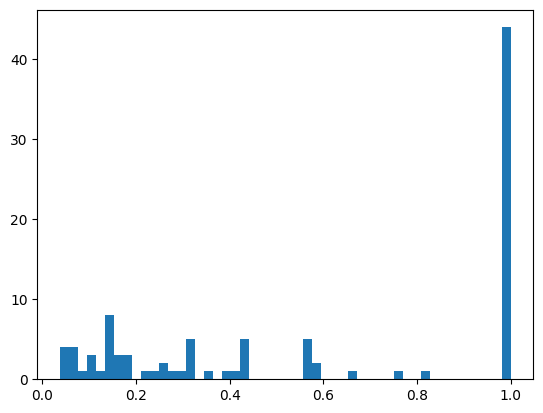

In [26]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50);

In [27]:
import numpy as np
np.mean(scores)

0.5990809099501675

In [28]:
np.random.seed(1)

def print_random_translation():
    i = np.random.choice(len(eng_phrases_subset))
    eng = eng_phrases_subset[i]
    print("EN:", eng)

    translation = translations[i]['translation_text']
    print("ES translation:", translation)

    matches = eng2spa[eng]
    print("Matches:", matches)

In [29]:
print_random_translation()

EN: Tom isn't that young.
ES translation: Tom no es tan joven.
Matches: ['Tom no es tan joven.']


In [30]:
print_random_translation()

EN: Tom is proud of Mary.
ES translation: Tom está orgulloso de María.
Matches: ['Tom está orgulloso de Mary.']


In [31]:
print_random_translation()

EN: Tom must be Canadian.
ES translation: Tom debe ser canadiense.
Matches: ['Tom tiene que ser canadiense.']


In [32]:
print_random_translation()

EN: Tom is old-fashioned.
ES translation: Tom es anticuado.
Matches: ['Tom es anticuado.']
